In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Primera Parte

a. Reproducir la Figura 10.1 del texto guia.

b. Reproducir la Figura 10.4 del texto guia.

El dataset se puede bajar de esta pagina  https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [20]:
data = pd.read_csv('USArrests.csv')
X = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Figura 10.1

In [21]:
# Estan en diferentes ordenes, para comparar las variables los escalo a todos en un mismo rango
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Hago un PCA que proyecte los datos a un subespacio generado por las dos componentes principales
pca = PCA(n_components=2, whiten=True)
pca.fit(X_s)
principal_components = pca.fit_transform(X_s)
components = pca.components_

Text(0,0.5,'Second Principal Component')

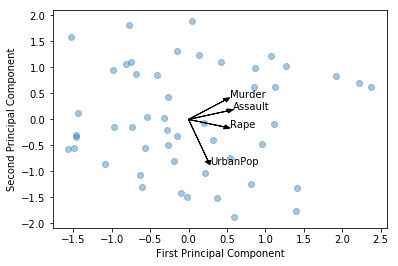

In [26]:
# Plots
# grafica la base de los datos en el subespacio nuevo
for i in range(components.shape[1]):
    plt.arrow(0, 0, components[0,i], components[1,i], length_includes_head=True, head_width=0.08, head_length=0.08, fc='k', ec='k')
    plt.text(components[0,i], components[1,i], X.keys()[i])
    
plt.scatter(principal_components[:,1], principal_components[:,0], alpha=0.4)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Figura 10.4

Text(0,0.5,'Cumulative Prop. Variance Explained')

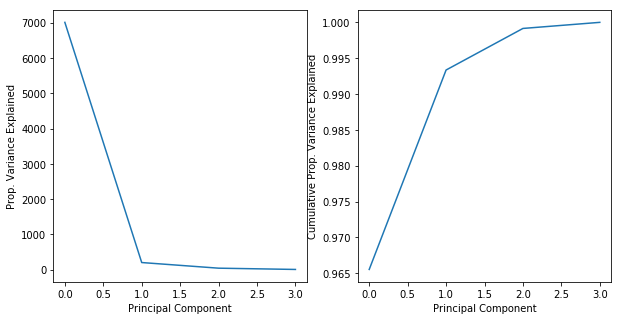

In [31]:
PC = np.arange(1.0, 5.0, 1.0)

# PCA de 4 componentes
pca = PCA(n_components=4, whiten=True)
pca.fit(X)
principal_components = pca.fit_transform(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(pca.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')

plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')

# Segunda Parte 

c. Utilizando el dataset Cars93 y las variables 'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight' encuentre las componentes principales que expresan el 80% de la varianza.

In [42]:
data = pd.read_csv('Cars93.csv')
Data = data.dropna()
XX = Data[['MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]

In [43]:
# Estan en diferentes ordenes, para comparar las variables los escalo a todos en un mismo rango
scaler = StandardScaler()
XX_s = scaler.fit_transform(XX)

# Hago el PCA para el numero de componentes igual a el numero de predictores
pca = PCA(n_components=XX_s.shape[1], whiten=True)
pca.fit(XX_s)
perc_var = pca.explained_variance_ratio_
principal_components = pca.fit_transform(XX_s)
components = pca.components_

Text(0.5,1,'Primeras componentes que explican 78 % de la varianza')

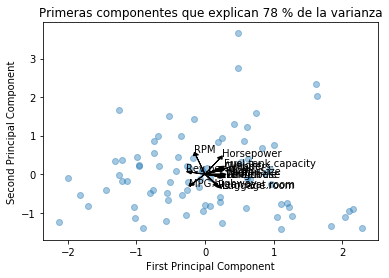

In [51]:
# Plots del PCA 
plt.figure()
for i in range(components.shape[1]):
    plt.arrow(0, 0, components[0,i], components[1,i], length_includes_head=True, head_width=0.08, head_length=0.08, fc='k', ec='k')
    plt.text(components[0,i], components[1,i], XX.keys()[i])
    
plt.scatter(principal_components[:,0], principal_components[:,1], alpha=0.4)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Primeras componentes que explican 78 % de la varianza')

[0.68806175 0.09975469 0.06184482 0.03226326 0.02825251 0.02493153
 0.01782582 0.01474857 0.01109782 0.00686299 0.00560971 0.00425215
 0.00286909 0.00162527]
0.7878164406533721


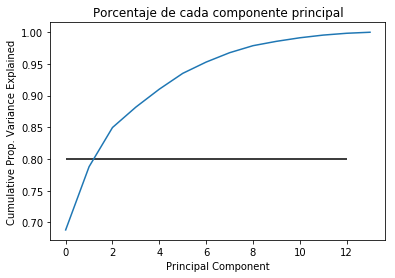

In [44]:
# Tasa de la varianza explicado por cada componente
print(perc_var)
# Suma de las tasas de los primeros dos componentes
print(perc_var[0]+perc_var[1])

# Grafica
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Porcentaje de cada componente principal')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
ax.hlines(y=0.8, xmin=0.0, xmax=12.0)